In [198]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [199]:
# Provide the correct path to the dataset
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Data\Titanic-Dataset2 (1).csv")    
df.set_index('PassengerId', inplace=True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [201]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [202]:
df.drop(['Cabin'], axis=1, inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

In [203]:
df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\2097741607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\1302638731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='YlGnBu_d')


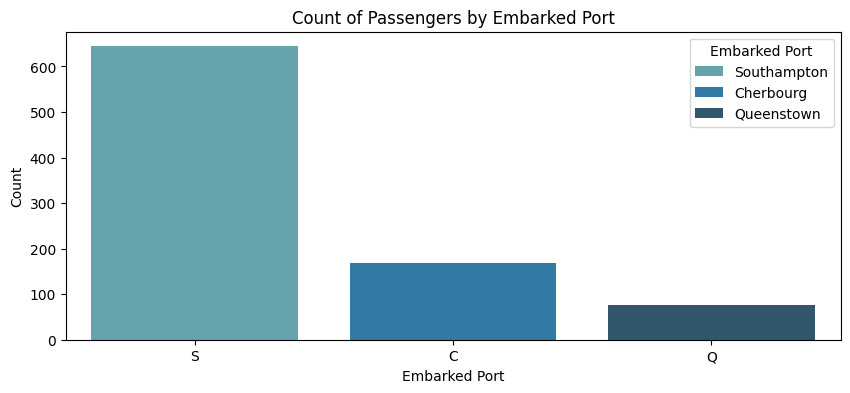

In [205]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Embarked', data=df, palette='YlGnBu_d')
plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.legend(title='Embarked Port', labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\2382754002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


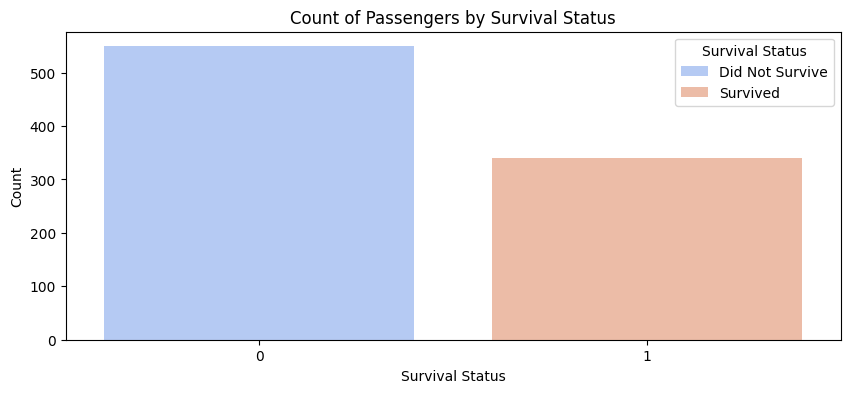

In [206]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title('Count of Passengers by Survival Status')
plt.xlabel('Survival Status')
plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
plt.ylabel('Count')
plt.show()

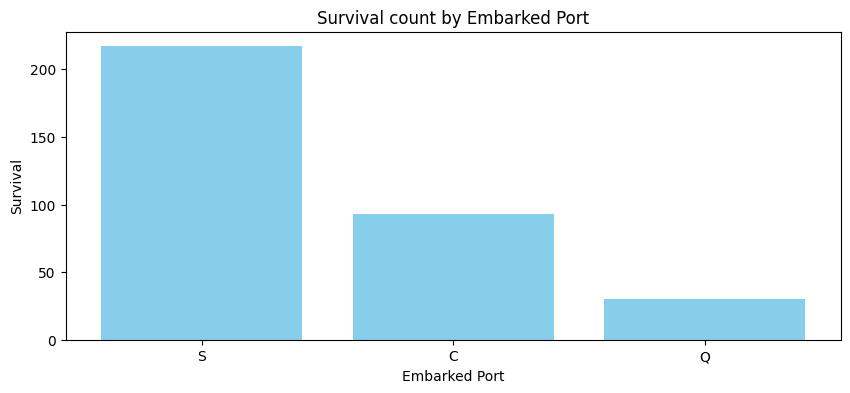

In [207]:
survive=df[df['Survived'] == 1]
survive_count = survive['Embarked'].value_counts()

plt.figure(figsize=(10, 4))
plt.bar(survive_count.index, survive_count.values, color='skyblue')
plt.title('Survival count by Embarked Port')
plt.xlabel('Embarked Port') 
plt.ylabel('Survival')
plt.show()

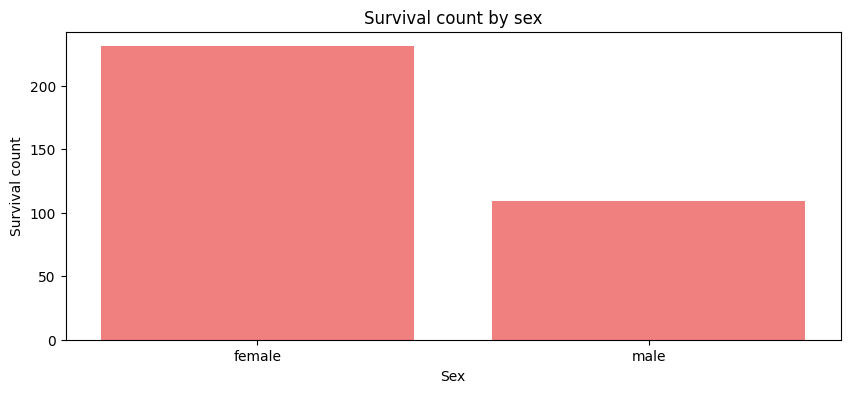

In [208]:
survive=df[df['Survived'] == 1]
survive_sex = survive['Sex'].value_counts()
plt.figure(figsize=(10, 4))
plt.bar(survive_sex.index, survive_sex.values, color='lightcoral')
plt.title('Survival count by sex')
plt.xlabel('Sex')
plt.ylabel('Survival count')
plt.show()


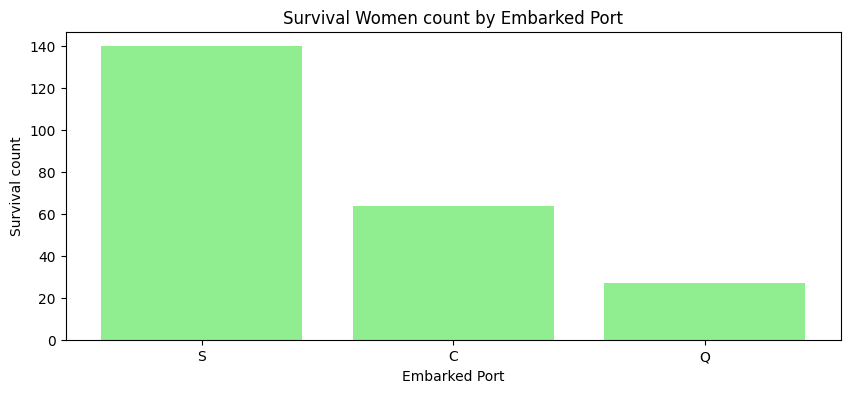

In [209]:
survived_women = df[(df['Survived'] == 1) & (df["Sex"] == "female")]
survived_women_count = survived_women['Embarked'].value_counts()
plt.figure(figsize=(10, 4))
plt.bar(survived_women_count.index, survived_women_count.values, color='lightgreen')
plt.title('Survival Women count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival count')
plt.show()

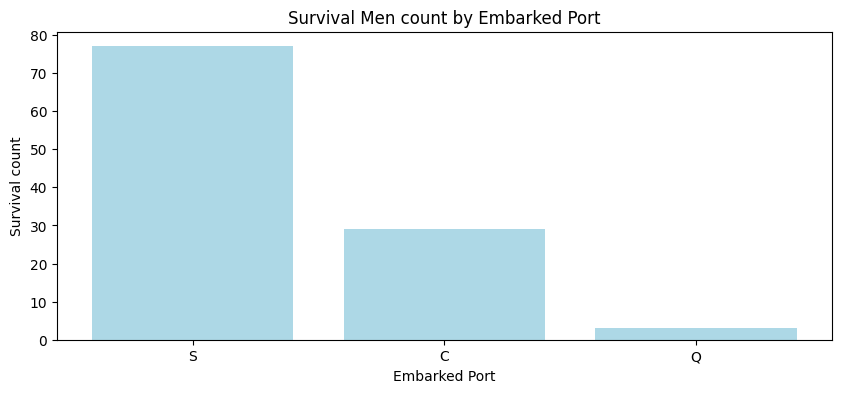

In [210]:
survived_men = df[(df['Survived'] == 1) & (df["Sex"] == "male")]
survived_men_count = survived_men['Embarked'].value_counts()
plt.figure(figsize=(10, 4))
plt.bar(survived_men_count.index, survived_men_count.values, color='lightblue')
plt.title('Survival Men count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\3054745458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')


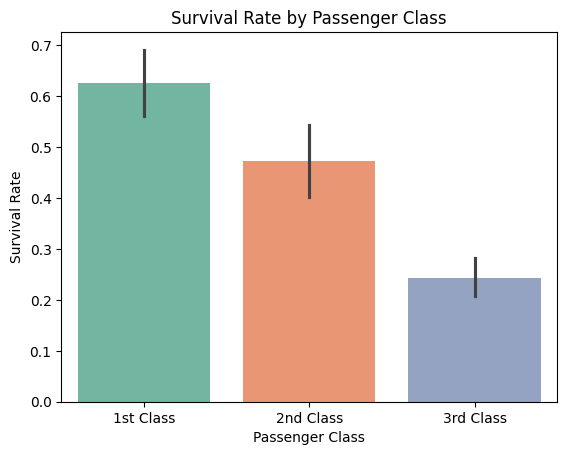

In [211]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')   
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

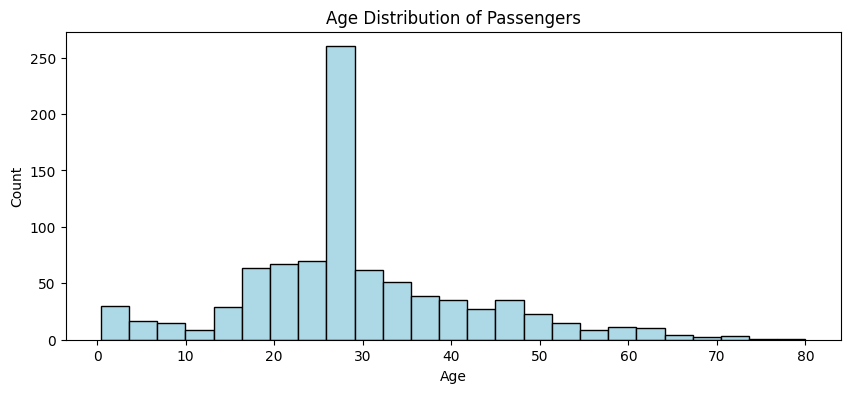

In [212]:
plt.figure(figsize=(10, 4))
plt.hist(df['Age'], bins=25, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Passengers') 
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

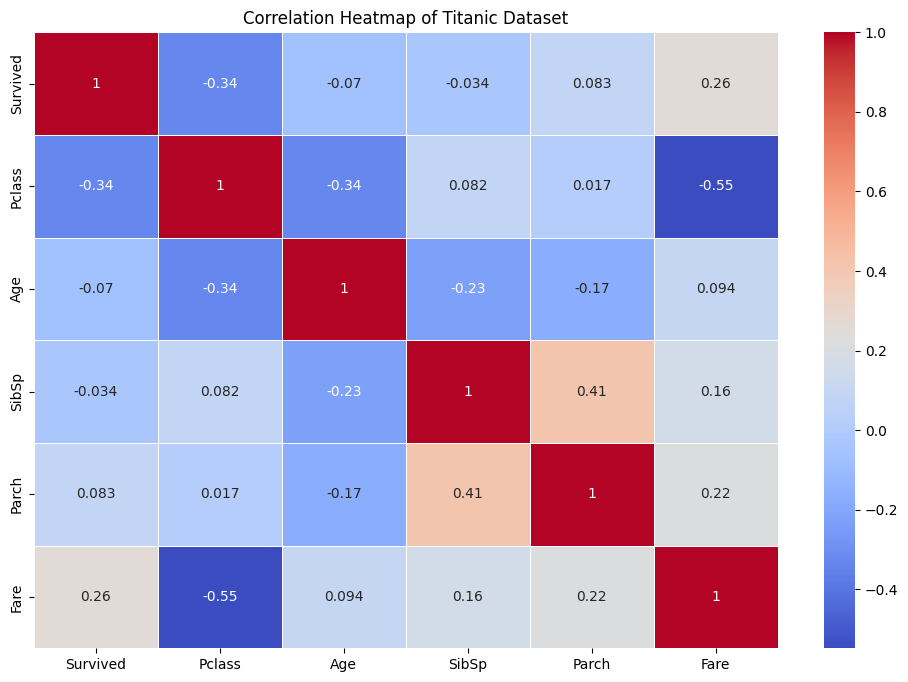

In [213]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset') 
plt.show()

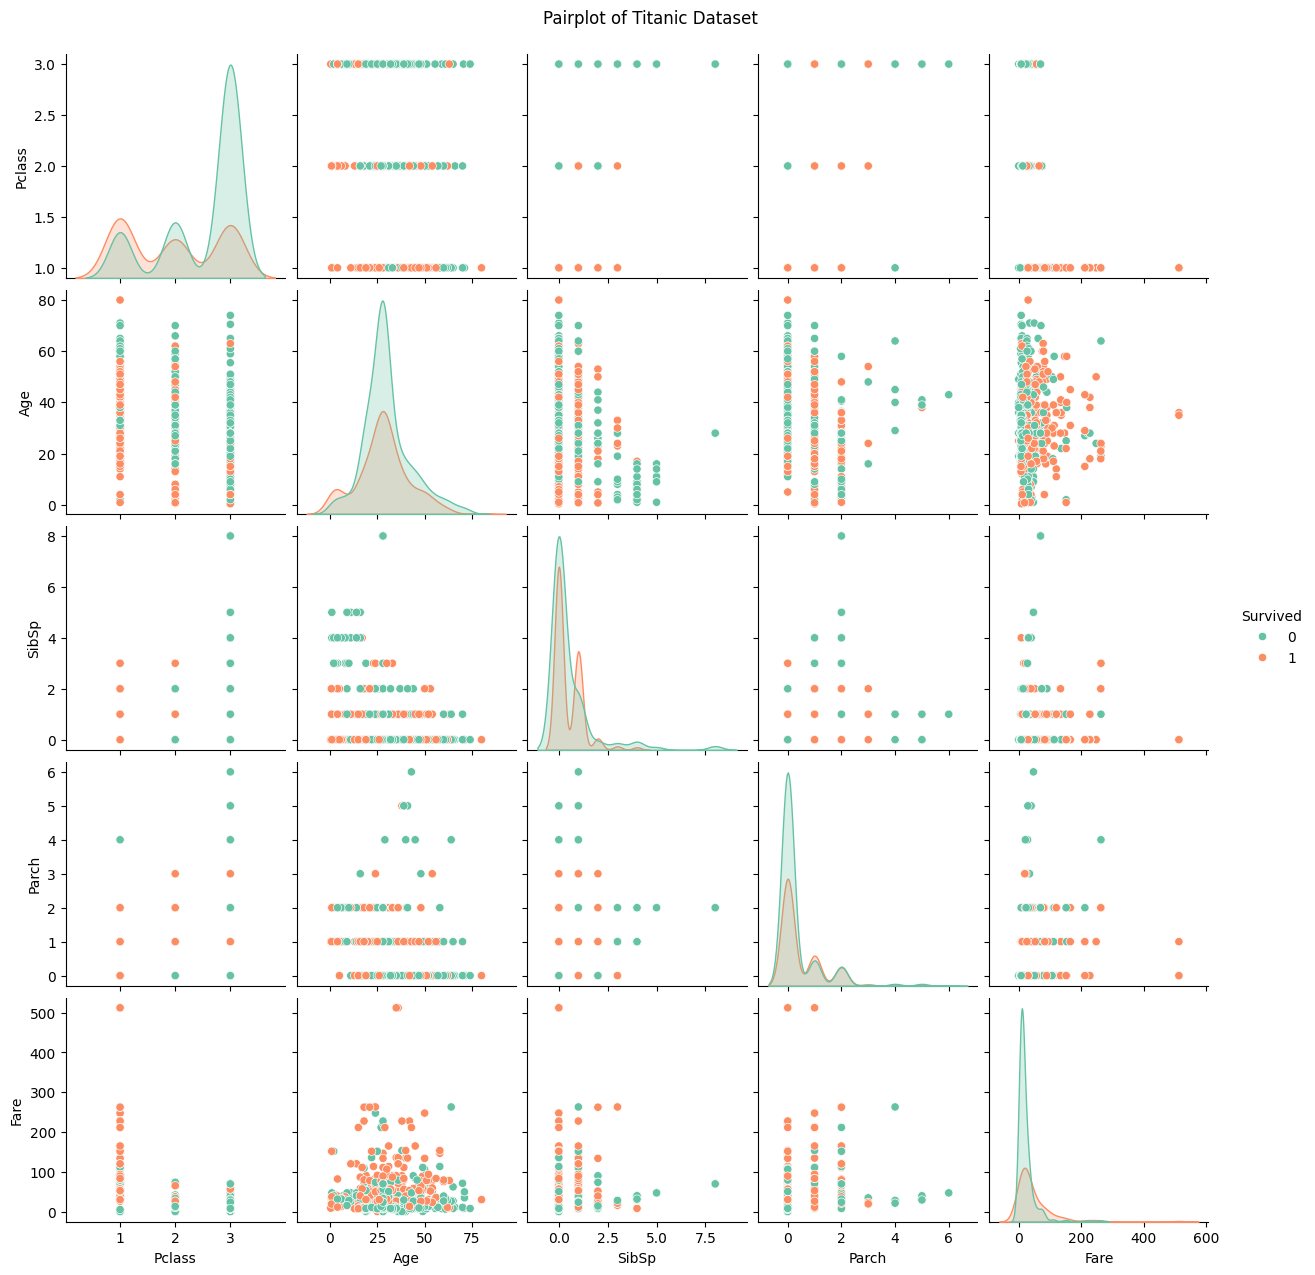

In [214]:
sns.pairplot(df, hue="Survived", palette='Set2')
plt.suptitle('Pairplot of Titanic Dataset', y=1.02)
plt.show()

In [215]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1   
df['FamilySize'] = df['FamilySize'].astype(int) 
df["Sex"].replace({"female":0,"male":1},inplace=True)
df["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\3863113087.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({"female":0,"male":1},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21424\3863113087.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"].replace(

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,2
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,1
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,0,4


In [223]:
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','SibSp','Parch','FamilySize']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.797752808988764

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.71      0.74        73

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178


Confusion Matrix:
 [[90 15]
 [21 52]]


In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000) 
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8426966292134831

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       105
           1       0.79      0.84      0.81        73

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178


Confusion Matrix:
 [[89 16]
 [12 61]]


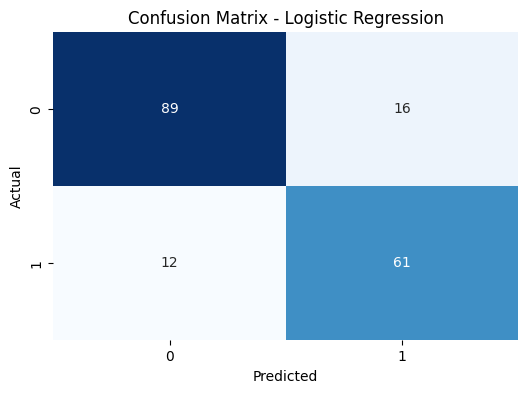

In [226]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

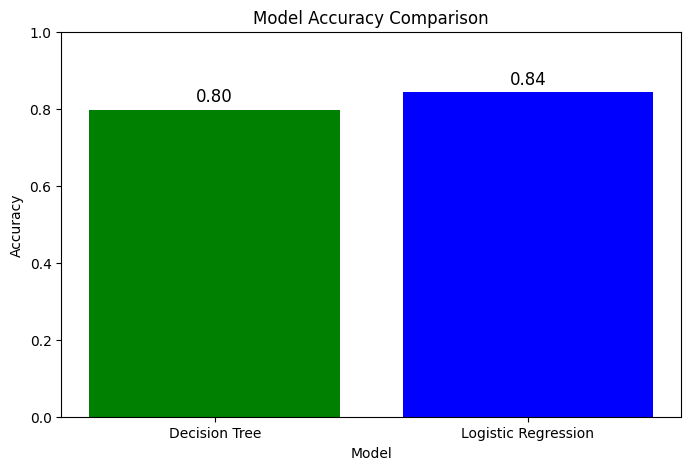

In [227]:
accuracy_tree = accuracy_score(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred_log)

models = ['Decision Tree', 'Logistic Regression']
accuracies = [accuracy_tree, accuracy_log]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['green', 'blue'])
plt.ylim(0,1)  
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
for i in range(len(accuracies)):
    plt.text(i, accuracies[i]+0.02, f'{accuracies[i]:.2f}', ha='center', fontsize=12)
plt.show()
